## Week 5 Digitizing data from a copy of a data plot

### Let's now look at getting points from a data plot from the literature.  This will allow us to reanalyze the data or to compare literature data with our experimental data -- think senior design research.

> The first steps here will look like what we did last week.  The one difference is now we want to quantify our data points.  Rather than our points being in pixel position coordinates, we want to convert these pixel coordinates into the coordinates of our data plot.  Let's get going!   

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import os

> We are going to walk through the steps and then at the end try to pull all this together into a function.  

Let's open a screen capture that I saved as an image of a plot from the journal article: Polymer Testing, vol 48, pp. 125-132 (2015).  File: `"crystallization kinetics poly testing 48 2015 p 125.png"`

#### This step is the same as before: Read and show our image file

<hr style="height: 3.0px"/>

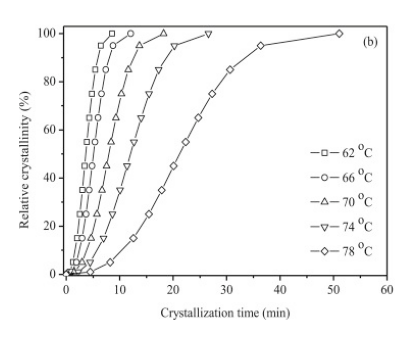

In [2]:
fig, ax = plt.subplots(figsize=[8,6])
ax.axis(False) #since this is an image, we don't need the x & y axis

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'.' # the dot just means the current directory
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) #matplotlib
ax=plt.imshow(img)

#### This step we did last week also:  Let's get the pixel positions of some of the data points.  

<hr style="height: 3.0px"/>

>To do this we will use **mpl_connect** which will look for "events" and report on them.  In our case the event we want is a "button press" (mouse click) event.  When the mouse is clicked, we call the function "onclick" which we defined below to update the title on our plot.  The click event gives us access to the x & y coordinates of the click through the variables called event.xdata and event.ydata.  So here we go...

<IPython.core.display.Javascript object>


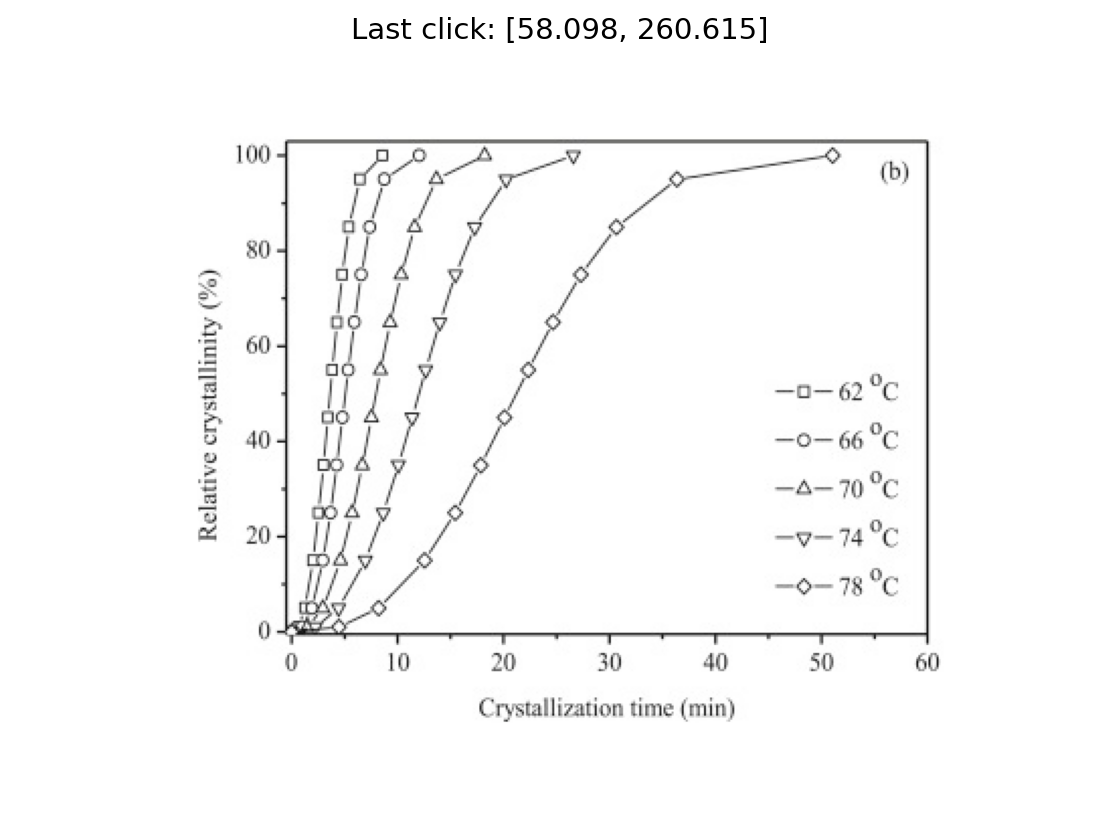

In [3]:
# need to tell matplotlib its output is in the notebook for interactive plotting
%matplotlib notebook 

fig, ax = plt.subplots()
ax.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'.' #path or "." for current directory
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) #matplotlib
ax=plt.imshow(img)

fig.suptitle(f'Last click: [0,0]  Click on the plot below.') #initializing the figure title (super title)

# here we define a function that we called "onclick" that changes the title when an "event" happens
def onclick(event):
    fig.suptitle(f'Last click: [{event.xdata:.3f}, {event.ydata:.3f}]') #button press event returns the xdata and ydata of the mouse position

# here we define the "event" as a button press and then call our function "onclick"
fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

Clicking on a few points in the above plot, what did you notice?  The y-coordinates don't seem right.  The origin is located in the upper left corner rather than the lower left.  We will have to fix this.

#### Now let's collect all those button clicks in a variable called "positions" and fix the y-axis. 

<hr style="height: 3.0px"/>

>We can do this by initializing our variable "positions" and then adding **.append** to our "onclick" function to append each click to "positions."  We fix the y-axis by simply subtracting each y value by the total number of pixels of our image in the y direction (**img.shape[0]**)

<IPython.core.display.Javascript object>


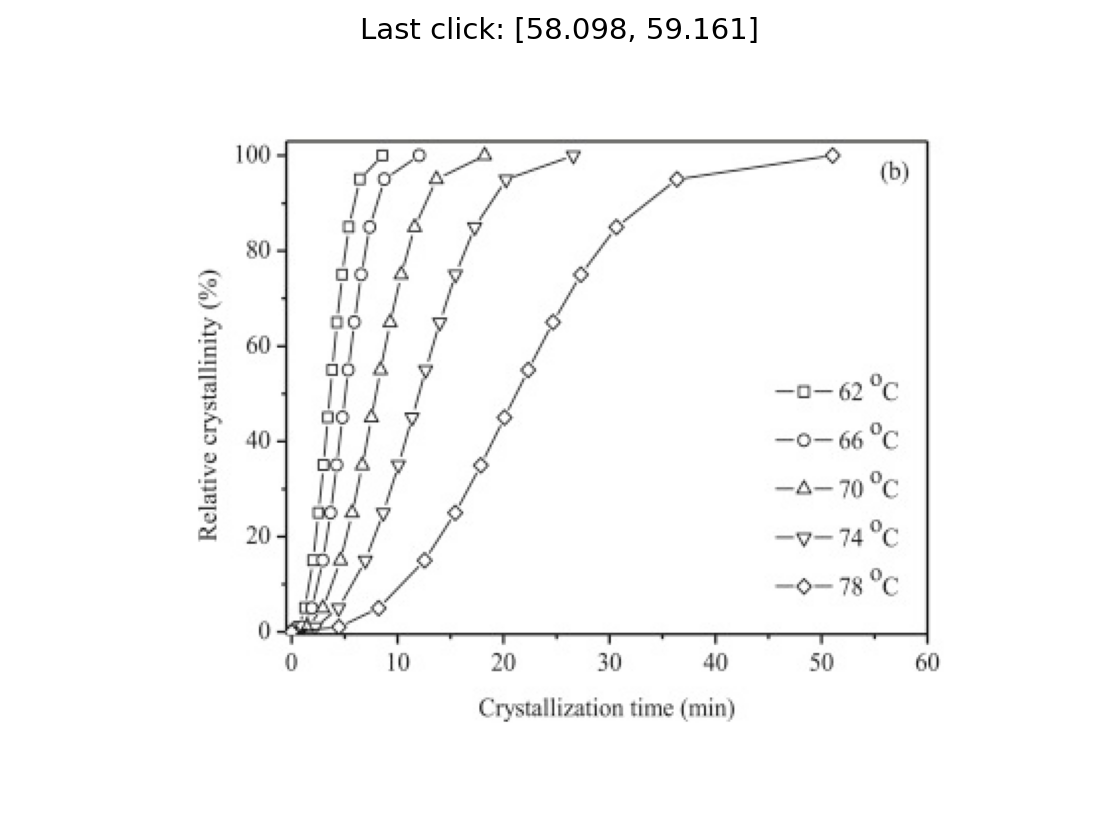

In [4]:
# need to tell matplotlib its output is in the notebook for interactive plotting
%matplotlib notebook 

fig, ax = plt.subplots()
ax.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'.' #path or "." for current directory
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) #matplotlib
ax=plt.imshow(img)

ydim=img.shape[0] # remember from the previous lesson that the image origin is in the 
    # upper left corner we need to place it in the lower left corner

fig.suptitle(f'Last click: [0,0]  Click on the plot below.')

positions=[] #initialize our variable
def onclick(event):
    fig.suptitle(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]') 
    positions.append([event.xdata,ydim-event.ydata]) #append each click to the list "positions"

fig.canvas.mpl_connect('button_press_event', onclick)
fig.show()

In [5]:
# execute only after clicking on the plot above
positions

[[325.6307864498782, 293.79313732328865],
 [240.78230160139333, 271.28231481246615],
 [189.70005051914228, 216.7368602670116],
 [151.6048124239042, 141.4121849423363],
 [123.89918471827649, 92.9273364574878],
 [88.40134922044099, 63.49010702025839],
 [58.09831891741068, 59.16110269125403]]

<IPython.core.display.Javascript object>


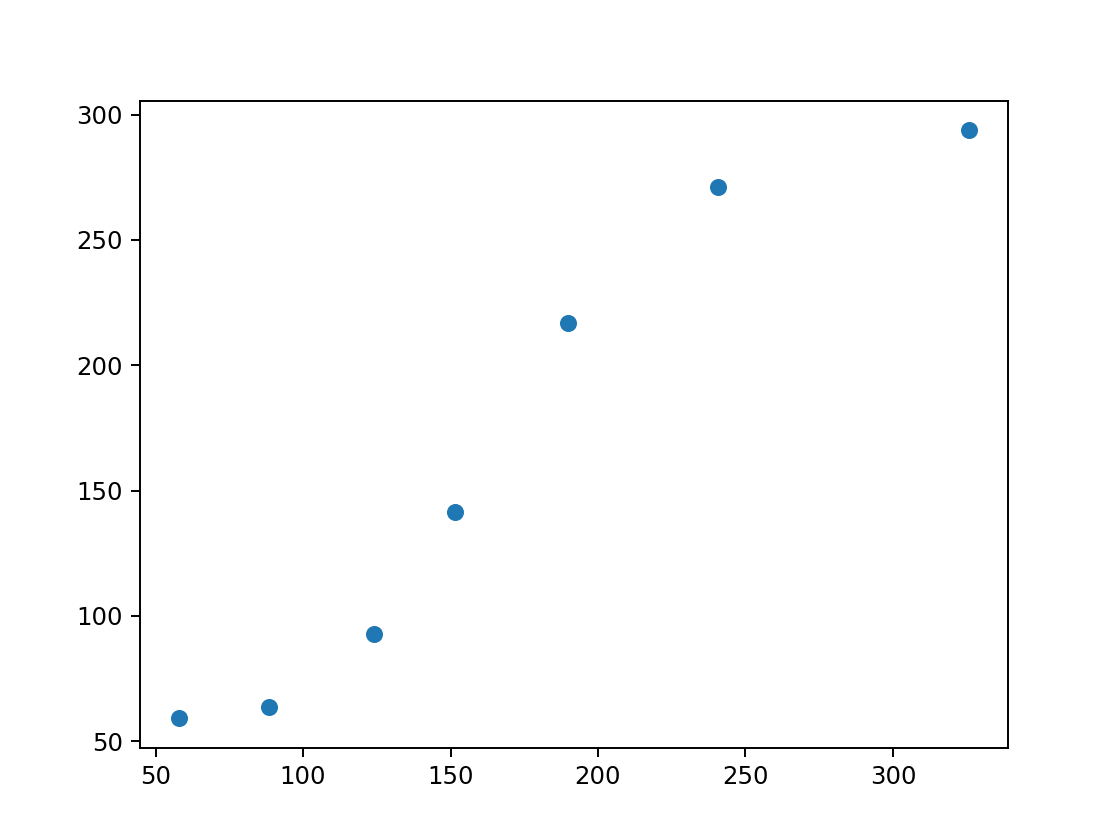

In [6]:
xdata=np.array(positions)[:,0]
ydata=np.array(positions)[:,1]
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
fig.show()

#### It's working!  So Let's get a bit fancier and include the scatter plot in our "onclick" function so we can see the plot develop as we select points.   

<hr style="height: 3.0px"/>

1. Change subplots to include 1 row and 2 columns (for two plots)
2. Set labels on the x and y axes
3. Add the scatter plot to our "onclick" function so the plot updates on every click

<IPython.core.display.Javascript object>


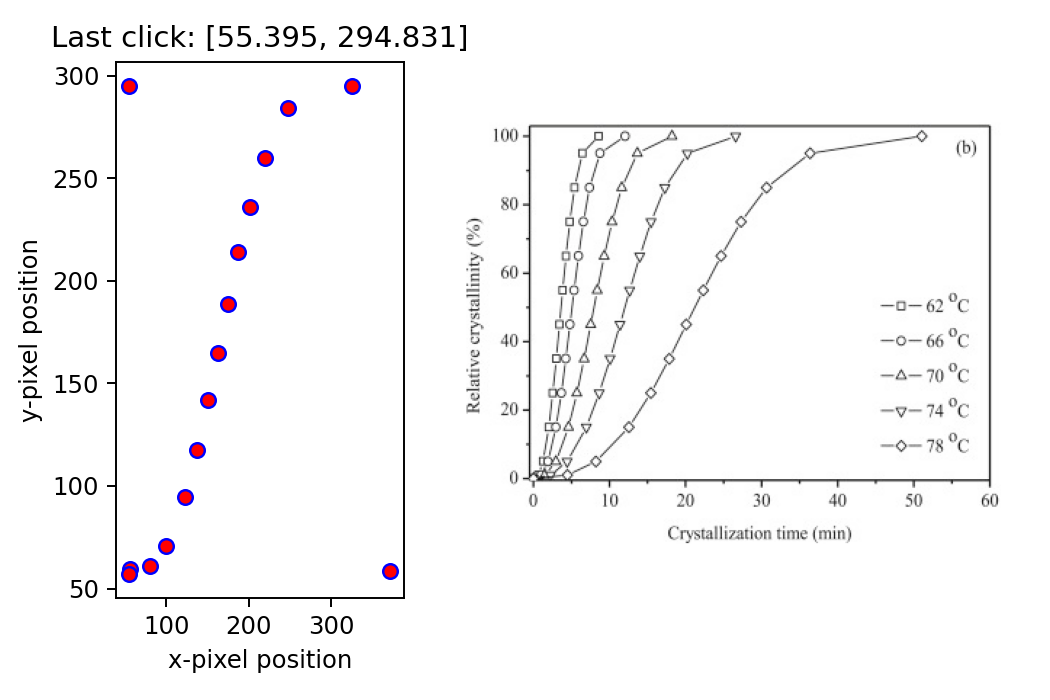

In [2]:
%matplotlib notebook

#now we have 1 row and 2 columns i.e. 2 figures in a row
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2,figsize=(6, 4), gridspec_kw={'width_ratios': [1, 2]})
ax2.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'.'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img = mpimg.imread(os.path.join(path, filename)) 
ax2=plt.imshow(img)
#notice above we asigned the image to ax2 which is the image on the right

# recall from part 1 that image files have coord in left top corner so we need to correct by the y-dimension of the file
ydim=img.shape[0]

# setting title and labels for ax1 (figure on the left)
ax1.set_title('Click on data in figure to the right')
ax1.set_xlabel('x-pixel position')
ax1.set_ylabel('y-pixel position')

pos = []
def onclick(event):
    pos.append([event.xdata,ydim-event.ydata])
    ax1.set_title(f'Last click: [{event.xdata:.3f}, {ydim-event.ydata:.3f}]')
    ax1.scatter(event.xdata, ydim-event.ydata,marker='o', c='r', edgecolor='b') #adding scatter plot
    
fig.canvas.mpl_connect('button_press_event', onclick) 
fig.tight_layout()
fig.show()

#### We stored our data this time in variable "pos"

In [3]:
pos

[[324.3348419738059, 294.83092625077103],
 [247.15043591106365, 283.97686914819786],
 [219.41228998226558, 259.8567422535909],
 [201.3221948113104, 235.7366153589839],
 [186.8501186745462, 214.02850115383762],
 [174.7900552272427, 188.70236791450031],
 [162.7299917799392, 164.58224101989333],
 [150.66992833263572, 141.6681204700167],
 [137.4038585406019, 117.54799357540972],
 [122.9317824038377, 94.63387302553309],
 [100.0176618539611, 70.51374613092614],
 [80.72156033827554, 60.86569537308333],
 [56.601433443668554, 59.659689028353],
 [371.36908941828955, 58.453682683622674],
 [55.39542709893817, 57.24767633889229],
 [55.39542709893817, 294.83092625077103]]

The problem with the data above is that it is units of pixels and not minutes and relative crystallinity so we need to transform this data into the units of our plot using a method similar to what is used in crystallography using the transformation matrix.  

The general formula will be $m \cdot \ (pixel\ coord - \text{pixel offset}) = plot\ values$ where $m$ is the transformation matrix.  

$$\begin{bmatrix}m11 & m12 \\m21 & m22 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}Ox\\ Oy\end{array}\right]\right)=\left[\begin{array}{c}Xvalue\\ Yvalue\end{array}\right]$$

The transformation matrix takes care of rotations and any linear distortions.  

We just need three known pixel coordinates and the corresponding plot values to solve for our unknowns: m11, m12, m21, m22, Ox, Oy  
So let's pick one point along the x-axis, the plot origin, and one point along the y-axis

#### from the plot above the three points I chose along  the axes are:  
*(Xvalue, Yvalue)*
1. (60 min, 0 %)
2. (0 min, 0 %)
3. (0 min, 100 %)

#### and the corresponding pixel coordinates for these three are:  
> we got these by clicking on the image above and looking at the "last click" output on the plot  

*(pixX, pixY)*
1. (371.6, 59.1)
2. (56.1, 60.2)
3. (55.1, 296.2)

To solve an equation using variables, we need to import sympy (symbolic python)

In [4]:
import sympy as sym
from sympy import solve

In [5]:
# define variables
m11, m12, m21, m22, Ox, Oy = sym.symbols('m11, m12, m21, m22, Ox, Oy')
# define transformation matrix and offset matrix
m = sym.Matrix([[m11, m12],[m21, m22]])
offset=sym.Matrix([Ox,Oy])
display(m)
display(offset)

Matrix([
[m11, m12],
[m21, m22]])

Matrix([
[Ox],
[Oy]])

Remember from 2114, Sympy wants equations that equal zero so we will rewrite:   

$$\begin{bmatrix}m11 & m12 \\m21 & m22 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}Ox\\ Oy\end{array}\right]\right)=\left[\begin{array}{c}Xvalue\\ Yvalue\end{array}\right]$$

as: 

$$\begin{bmatrix}m11 & m12 \\m21 & m22 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}Ox\\ Oy\end{array}\right]\right)-\left[\begin{array}{c}Xvalue\\ Yvalue\end{array}\right]=0$$

If we substitute our known values in for pixX, pixY, Xvalue, and Yvalue, we can calculate our unknown calibration parameters.    

#### Consider one set of values for pixel position (pixX, pixY) = (371.6, 59.1) and the corresponding plot values of  (Xvalue, Yvalue) = (60 min, 0 %).  

$$\left[\begin{array}{c}𝑚_{11}(371.6−O_𝑥)+𝑚_{12}(59.1−O_𝑦)−60\\ 𝑚_{21}(371.6−O_𝑥)+𝑚_{22}(59.1−O_𝑦)\end{array}\right]=\left[\begin{array}{c}0\\ 0\end{array}\right]$$

This gives two equations.  So all three calibration points gives us 6 equations to solve for the six parameters: m11, m12, m21, m22, Ox, Oy

In [6]:
# our six equations (3 sets of 2) are:  (remember each of these are set to zero by the solve function) 

print('Our equations: \n')
eq1=m*(sym.Matrix([371.6, 59.1])-offset)-sym.Matrix([60, 0])
print('eq1 = ',eq1,'\n')
eq2=m*(sym.Matrix([56.1, 60.2])-offset)-sym.Matrix([0, 0])
print('eq2 = ',eq2,'\n')
eq3=m*(sym.Matrix([55.1, 296.2])-offset)-sym.Matrix([0,100])
print('eq3 = ',eq3,'\n')

print('\n Our solution: ')
sol=solve([eq1,eq2,eq3])
sol


Our equations: 

eq1 =  Matrix([[m11*(371.6 - Ox) + m12*(59.1 - Oy) - 60], [m21*(371.6 - Ox) + m22*(59.1 - Oy)]]) 

eq2 =  Matrix([[m11*(56.1 - Ox) + m12*(60.2 - Oy)], [m21*(56.1 - Ox) + m22*(60.2 - Oy)]]) 

eq3 =  Matrix([[m11*(55.1 - Ox) + m12*(296.2 - Oy)], [m21*(55.1 - Ox) + m22*(296.2 - Oy) - 100]]) 


 Our solution: 


[{Ox: 56.1000000000000,
  Oy: 60.2000000000000,
  m11: 0.190177136034404,
  m12: 0.000805835322179677,
  m21: 0.00147736475732941,
  m22: 0.423735073579480}]

Now if we take any pixel point on the image we can convert it to real coordinates.  For example, the second to last point on the right most curve which is approx: (38, 95) has a pixel position in the image of: (249.355, 283.689).  Let's check to see if the conversion works:  

In [36]:
# np.dot(m, pixel-offset)
np.dot(np.array([[0.19, 0.00081],[0.0015,0.42]]),np.array([249.355,283.689])-np.array([56.1,60.2]))

array([36.89947609, 94.1552625 ])

>  I substituted everything by hand above. I don't want to do this everytime especially if I have a lot of points for conversion.  
  
> Now let's work on a function to perform our calibration given 3 points and then automatically convert a list of positions to real coordinates.  

In [7]:
# recall our solution from above
calib_param=sol[0] # [0] removing extra set of parenthesis
calib_param

{Ox: 56.1000000000000,
 Oy: 60.2000000000000,
 m11: 0.190177136034404,
 m12: 0.000805835322179677,
 m21: 0.00147736475732941,
 m22: 0.423735073579480}

In [8]:
# substitute our solution values into the m matrix and offset matrix 
# since our solution is in the form of a dictionary {key:value, ...} we can use .subs()
m_cal=m.subs(calib_param) # get the calibrated transformation matrix, m_cal
offset_cal=offset.subs(calib_param) # get the calibrated offset, offset_cal
display(m_cal)
display(offset_cal)

Matrix([
[  0.190177136034404, 0.000805835322179677],
[0.00147736475732941,     0.42373507357948]])

Matrix([
[56.1],
[60.2]])

In [9]:
# let's convert these sympy matrices to numpy arrays for our calculations
m_cal=np.array(m_cal).astype(np.float64) 
display(m_cal)
offset_cal=np.array(offset_cal).astype(np.float64)
display(offset_cal)

array([[0.19017714, 0.00080584],
       [0.00147736, 0.42373507]])

array([[56.1],
       [60.2]])

Now to find the plot values for any given pixel point we just use our initial equation: 
$\small\begin{bmatrix}0.1901771360 & 0.0008058353221 \\0.001477364757 & 0.423735074 \end{bmatrix}\cdot \left( \left[\begin{array}{c}pixX\\ pixY\end{array}\right] - \left[\begin{array}{c}56.1\\ 60.2\end{array}\right]\right)=\left[\begin{array}{c}Xvalue\\ Yvalue\end{array}\right]$

where we substituted for m_cal and offset_cal

check the format of our pixel coordinates

In [10]:
pos # (pixX, pixY) values

[[324.3348419738059, 294.83092625077103],
 [247.15043591106365, 283.97686914819786],
 [219.41228998226558, 259.8567422535909],
 [201.3221948113104, 235.7366153589839],
 [186.8501186745462, 214.02850115383762],
 [174.7900552272427, 188.70236791450031],
 [162.7299917799392, 164.58224101989333],
 [150.66992833263572, 141.6681204700167],
 [137.4038585406019, 117.54799357540972],
 [122.9317824038377, 94.63387302553309],
 [100.0176618539611, 70.51374613092614],
 [80.72156033827554, 60.86569537308333],
 [56.601433443668554, 59.659689028353],
 [371.36908941828955, 58.453682683622674],
 [55.39542709893817, 57.24767633889229],
 [55.39542709893817, 294.83092625077103]]

check the format of our offset_cal

In [11]:
offset_cal #always important to check your variables -- this one is a problem

array([[56.1],
       [60.2]])

we need to fix the offset_cal array so that it is a 1D array and not a 2D array

In [12]:
offset_cal.flatten()

array([56.1, 60.2])

not we can subtract the offset from all our pixel points

In [13]:
offset_pos=pos-offset_cal.flatten()
offset_pos

array([[268.23484197, 234.63092625],
       [191.05043591, 223.77686915],
       [163.31228998, 199.65674225],
       [145.22219481, 175.53661536],
       [130.75011867, 153.82850115],
       [118.69005523, 128.50236791],
       [106.62999178, 104.38224102],
       [ 94.56992833,  81.46812047],
       [ 81.30385854,  57.34799358],
       [ 66.8317824 ,  34.43387303],
       [ 43.91766185,  10.31374613],
       [ 24.62156034,   0.66569537],
       [  0.50143344,  -0.54031097],
       [315.26908942,  -1.74631732],
       [ -0.7045729 ,  -2.95232366],
       [ -0.7045729 , 234.63092625]])

Do you remember the nice compact way of performing simple loops called a *comprehension*.  Here's one to try:  ```[7*x for x in [3,4,5,6,7] if x<=6 and x>3]```  
https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions

In [14]:
# now dot m_cal with each offset value
data=np.array([np.dot(m_cal,i) for i in offset_pos]) #using comprehension rather than for loop
data

array([[ 5.12012079e+01,  9.98176335e+01],
       [ 3.65137520e+01,  9.51043593e+01],
       [ 3.12191540e+01,  8.48428362e+01],
       [ 2.77593947e+01,  7.45955668e+01],
       [ 2.49896435e+01,  6.53756969e+01],
       [ 2.26756865e+01,  5.46263088e+01],
       [ 2.03627013e+01,  4.43879480e+01],
       [ 1.80506880e+01,  3.46606143e+01],
       [ 1.55083480e+01,  2.44204717e+01],
       [ 1.27376250e+01,  1.46895746e+01],
       [ 8.36044633e+00,  4.43517838e+00],
       [ 4.68299427e+00,  3.18453503e-01],
       [ 9.49257746e-02, -2.28207909e-01],
       [ 5.99555653e+01, -2.74208455e-01],
       [-1.36372743e-01, -1.25204399e+00],
       [ 5.50802316e-02,  9.94203119e+01]])

<IPython.core.display.Javascript object>


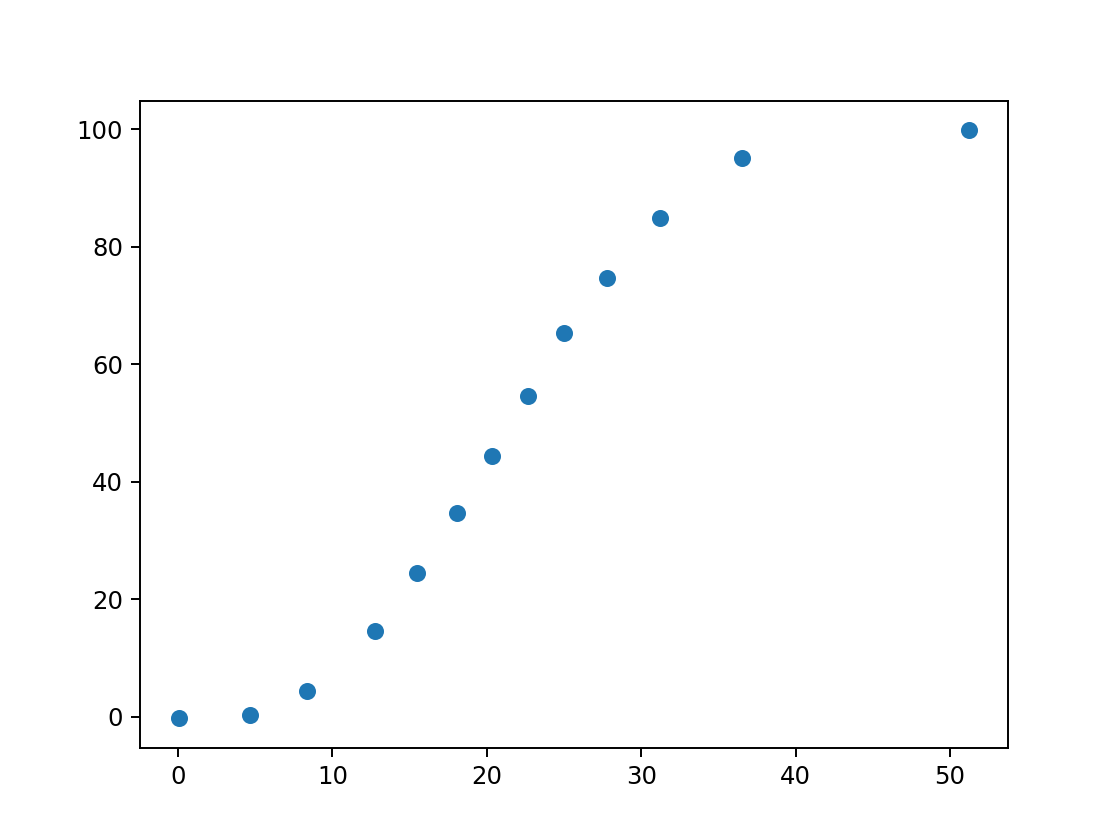

In [15]:
# plot our converted data
xdata=data[0:-3,0] #skip last three points - these were the axis calib pts
ydata=data[0:-3,1]
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
fig.show()

In [16]:
# converts pixels position to plot coordinates using the calibration above
def conv(pos, m_cal, offset_cal):
    offset_pos=pos-offset_cal.flatten()
    data=np.array([np.dot(m_cal,i) for i in offset_pos])
    return(data)

# test it
conv([[249.355, 283.689]], m_cal, offset_cal)

array([[36.93277775, 94.98563599]])

In [17]:
plot_data=conv(pos, m_cal, offset_cal)
plot_data

array([[ 5.12012079e+01,  9.98176335e+01],
       [ 3.65137520e+01,  9.51043593e+01],
       [ 3.12191540e+01,  8.48428362e+01],
       [ 2.77593947e+01,  7.45955668e+01],
       [ 2.49896435e+01,  6.53756969e+01],
       [ 2.26756865e+01,  5.46263088e+01],
       [ 2.03627013e+01,  4.43879480e+01],
       [ 1.80506880e+01,  3.46606143e+01],
       [ 1.55083480e+01,  2.44204717e+01],
       [ 1.27376250e+01,  1.46895746e+01],
       [ 8.36044633e+00,  4.43517838e+00],
       [ 4.68299427e+00,  3.18453503e-01],
       [ 9.49257746e-02, -2.28207909e-01],
       [ 5.99555653e+01, -2.74208455e-01],
       [-1.36372743e-01, -1.25204399e+00],
       [ 5.50802316e-02,  9.94203119e+01]])

### Let's compare to the original image

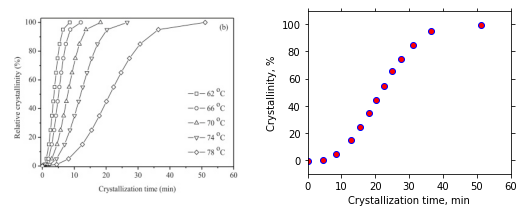

In [18]:
%matplotlib inline

#now we have 1 row and 2 columns i.e. 2 figures in a row
fig3_1, (ax3_1, ax3_2) = plt.subplots(nrows=1, ncols=2,figsize=(8, 3))

ax3_1.clear()
ax3_2.clear()

#set the scatter plot for axes 3_2 i.e. the right plot
ax3_2.scatter(np.array(plot_data)[:-3,0],np.array(plot_data)[:-3,1],marker='o', c='r', edgecolor='b');
ax3_2.set_xlabel('Crystallization time, min')
ax3_2.set_ylabel('Crystallinity, %');
ax3_2.set_xlim(0,60)
ax3_2.set_ylim(-10,110)

# turn off the x, y axis on the image - the axis doesn't make sense for an image
ax3_1.axis(False)

# we use matplotlib.imread to read our image file and imshow to display it.
path=r'.'
filename ='crystallization kinetics poly testing 48 2015 p 125.png'
img2 = mpimg.imread(os.path.join(path, filename)) 

# This is the better way to display images along with normal plots
# You have to use the .add_axes function to place the image in your figure
# The image could even overlap another plot if you want. Play with the numbers to see what happens
# .add_axes([left, bottom, width, height]) all values are fractions of the overall figure size
# zorder allows you to place images in front of other images or plots.  0 = place behind, 10 = in front
image_axis = fig3_1.add_axes([0, 0, 0.47, 0.9], zorder=10, anchor=(0.5,0.5)) #zorder places figure on top of anything else in axes
image_axis.imshow(img2)
image_axis.axis('off')
 
plt.show()

### Homework hints:

In [21]:
display(plot_data[:-3,1]) # % crystallinity
# for the homework you want the fraction of crystallinity
display(plot_data[:-3,1]/100)

array([99.8176335 , 95.10435929, 84.84283619, 74.59556678, 65.37569687,
       54.62630883, 44.38794797, 34.6606143 , 24.42047173, 14.68957464,
        4.43517838,  0.3184535 , -0.22820791])

array([ 0.99817634,  0.95104359,  0.84842836,  0.74595567,  0.65375697,
        0.54626309,  0.44387948,  0.34660614,  0.24420472,  0.14689575,
        0.04435178,  0.00318454, -0.00228208])

If you see a negative number in your data set, it means that your pixel position for that point was lower than the point you picked to represent (0,0) so either recalibrate or just take the abs() of your data.  If you don't, you will have problems with the log function since you can't take the log of a negative number. 

In [22]:
np.abs(plot_data[:-3,1]/100) # what was that -3 for again?

array([0.99817634, 0.95104359, 0.84842836, 0.74595567, 0.65375697,
       0.54626309, 0.44387948, 0.34660614, 0.24420472, 0.14689575,
       0.04435178, 0.00318454, 0.00228208])

In [23]:
plot_data[:-3,0] #the above comments are also true for the time data
#our time data here is okay -- no negative numbers

array([51.20120792, 36.51375205, 31.21915404, 27.7593947 , 24.98964355,
       22.67568653, 20.36270135, 18.05068801, 15.508348  , 12.737625  ,
        8.36044633,  4.68299427,  0.09492577])

Want a log scale?  Recall: 

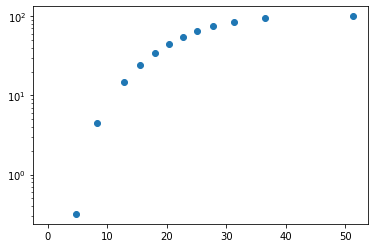

In [30]:
xdata=data[0:-3,0] #skip last three points - these were the axis calib pts
ydata=data[0:-3,1]
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.set_yscale('log') #setting y axis to log scale
plt.show()